In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import datetime as dt

In [2]:
os.getcwd()

'/content'

In [3]:
features =pd.read_csv('/content/walmart/features.csv')
sampleSubmission =pd.read_csv('/content/walmart/sampleSubmission.csv')
test =pd.read_csv('/content/walmart/test.csv')
train =pd.read_csv('/content/walmart/train.csv')
stores =pd.read_csv('/content/walmart/stores.csv')

In [4]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [6]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139088 entries, 0 to 139087
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         139088 non-null  int64  
 1   Dept          139088 non-null  int64  
 2   Date          139088 non-null  object 
 3   Weekly_Sales  139088 non-null  float64
 4   IsHoliday     139088 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 4.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [7]:
# Descriptive Analytics
# features.columns.tolist()
# features.describe().keys().tolist #described columns to list
# features.count() # total number of values per column
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [8]:
features.iloc[-5:].Store #Accessing the last five stores
#features["IsHoliday"].replace([True,False],[1,0]) # replacing multiple elements
#features.rename(columns={"A" : "a", "B": "b"}) # renaming of columns

8185    45
8186    45
8187    45
8188    45
8189    45
Name: Store, dtype: int64

In [9]:
features.Store.nunique() # obtaining number of unique values

45

In [10]:
# We need to concatenate the train, test and features dataset for uniformity in categorical conversions and feature engineering
features_len = len(features)
train_len = len(train)
test_len = len(test)
dataset =  pd.concat(objs=[features,train,test], axis=0).reset_index(drop=True)


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262342 entries, 0 to 262341
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         262342 non-null  int64  
 1   Date          262342 non-null  object 
 2   Temperature   8190 non-null    float64
 3   Fuel_Price    8190 non-null    float64
 4   MarkDown1     4032 non-null    float64
 5   MarkDown2     2921 non-null    float64
 6   MarkDown3     3613 non-null    float64
 7   MarkDown4     3464 non-null    float64
 8   MarkDown5     4050 non-null    float64
 9   CPI           7605 non-null    float64
 10  Unemployment  7605 non-null    float64
 11  IsHoliday     262342 non-null  bool   
 12  Dept          254152 non-null  float64
 13  Weekly_Sales  139088 non-null  float64
dtypes: bool(1), float64(11), int64(1), object(1)
memory usage: 26.3+ MB


In [12]:
dataset.isnull().sum()

Store                0
Date                 0
Temperature     254152
Fuel_Price      254152
MarkDown1       258310
MarkDown2       259421
MarkDown3       258729
MarkDown4       258878
MarkDown5       258292
CPI             254737
Unemployment    254737
IsHoliday            0
Dept              8190
Weekly_Sales    123254
dtype: int64

In [13]:
# Droping Columns that have little importance on the overall model perfomance
# We drop Markdowns since data contained is anonymized and hence not useful
dataset.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis=1, inplace =True)

In [14]:
dataset.isnull().sum()

Store                0
Date                 0
Temperature     254152
Fuel_Price      254152
CPI             254737
Unemployment    254737
IsHoliday            0
Dept              8190
Weekly_Sales    123254
dtype: int64

In [15]:
# lets try find out which rows have Superbowl holidays .
dataset[(dataset.Date == '2010-02-12' ) | (dataset.Date == '2011-02-11') | (dataset.Date == '2012-02-10') | (dataset.Date == '2013-2-08')].count()

Store           3087
Date            3087
Temperature      135
Fuel_Price       135
CPI              135
Unemployment     135
IsHoliday       3087
Dept            2952
Weekly_Sales    2952
dtype: int64

In [16]:
# Replace the SuperBowl holidays with an S.Dates defined in Kaggle 
dataset.Date.replace(['2010-02-12','2011-02-11','2012-02-10','2013-2-08'],'S',inplace=True) # 2012-02-10 made S by mistake

In [17]:
dataset[dataset.Date=='S'].count()


Store           3087
Date            3087
Temperature      135
Fuel_Price       135
CPI              135
Unemployment     135
IsHoliday       3087
Dept            2952
Weekly_Sales    2952
dtype: int64

In [18]:
# Replace the Labour holidays with an L .Dates defined in Kaggle 
dataset.Date.replace(['2010-09-10','2011-09-09','2012-09-07','2013-09-06'],'L',inplace=True) 

In [19]:
dataset[dataset.Date=='L'].count()

Store           3053
Date            3053
Temperature      135
Fuel_Price       135
CPI              135
Unemployment     135
IsHoliday       3053
Dept            2918
Weekly_Sales    2918
dtype: int64

In [20]:
# Replace the Thanksgiving holidays with a T .Dates defined in Kaggle 
dataset.Date.replace(['2010-11-26','2011-11-25','2012-11-23','2013-11-29'],'T',inplace=True) 

In [21]:
dataset[dataset.Date=='T'].count()

Store           5081
Date            5081
Temperature      135
Fuel_Price       135
CPI              135
Unemployment     135
IsHoliday       5081
Dept            4946
Weekly_Sales    1970
dtype: int64

In [22]:
# Replace the Christmass holidays with a C .Dates defined in Kaggle 
dataset.Date.replace(['2010-12-31','2011-12-30','2012-12-28','2013-12-27'],'C',inplace=True) 

In [23]:
dataset[dataset.Date=='C'].count()

Store           5086
Date            5086
Temperature      135
Fuel_Price       135
CPI              135
Unemployment     135
IsHoliday       5086
Dept            4951
Weekly_Sales    1963
dtype: int64

In [24]:
# Replace the other date values with N for normal day
dataset.loc[dataset.Date.str.len() > 1,'Date'] = 'N'

In [25]:
dataset.Date.loc[-50:]

0         N
1         S
2         N
3         N
4         N
         ..
262337    N
262338    N
262339    N
262340    N
262341    N
Name: Date, Length: 262342, dtype: object

## Our Date is now in terms of S,L,C,T,N. We can normalize this values into 1 and zeros

In [26]:
# Replacinng Column names to lower case. Not essential
#dataset.rename(columns={"IsHoliday":"is_holiday","Fuel_Price":"fuel_price","Temperature":"temperature","CPI":"cpi","Unemployment":"unemployment","Date":"date","Store":"store","Dept":"dept","Weekly_Sales":"weekly_sales"}, inplace=True)


In [27]:
dataset.IsHoliday.isnull().sum()

0

In [28]:
# fill the missing Is_Holiday value with False, since it is the most prevalent value
dataset.IsHoliday= dataset.IsHoliday.fillna(False)

In [29]:
# Converting from boolean to int
dataset["IsHoliday"] = dataset["IsHoliday"].astype('int64')

In [30]:
dataset.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
IsHoliday         int64
Dept            float64
Weekly_Sales    float64
dtype: object

In [31]:
dataset.isnull().sum()

Store                0
Date                 0
Temperature     254152
Fuel_Price      254152
CPI             254737
Unemployment    254737
IsHoliday            0
Dept              8190
Weekly_Sales    123254
dtype: int64

In [32]:
train.Dept.head()

0    1
1    1
2    1
3    1
4    1
Name: Dept, dtype: int64

In [33]:
dataset.describe()

,Store,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
count,262342.000000,8190.000000,8190.000000,7605.000000,7605.000000,262342.000000,254152.000000,139088.000000
mean,14.489464,59.356198,3.405992,172.460809,7.826821,0.073629,43.767419,18790.462473
std,11.834593,18.678607,0.431337,39.738346,1.877259,0.261167,30.201846,26525.871538
min,1.000000,-7.290000,2.472000,126.064000,3.684000,0.000000,1.000000,-1098.000000
25%,6.000000,45.902500,3.041000,132.364839,6.634000,0.000000,18.000000,2758.432500
50%,11.000000,60.710000,3.513000,182.764003,7.806000,0.000000,36.000000,8843.740000
75%,21.000000,73.880000,3.743000,213.932412,8.567000,0.000000,72.000000,23442.750000
max,45.000000,101.950000,4.468000,228.976456,14.313000,1.000000,99.000000,693099.360000


In [34]:
# Getting dummies...One Hot Encoding
dataset = pd.get_dummies(dataset, columns = ["Date"], prefix="D")

Caveats of workdone so far. 
 Since test and train set is provided , we wont strife to further engineer the volumnious missing values, but might as well later split our own test and train set from features and see how well our modell generalise when provided with additional data.

 For now we work with the prvided test and train set.
 

In [35]:

# Splitting the train and test set from our dataset.
featuresf = dataset[:features_len]
trainf = dataset[features_len:(features_len+train_len)]
testf = dataset[(features_len+train_len):]
#testf.drop(labels=["Survived"],axis = 1,inplace=True)

In [36]:
#
trainf.info()
testf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139088 entries, 8190 to 147277
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         139088 non-null  int64  
 1   Temperature   0 non-null       float64
 2   Fuel_Price    0 non-null       float64
 3   CPI           0 non-null       float64
 4   Unemployment  0 non-null       float64
 5   IsHoliday     139088 non-null  int64  
 6   Dept          139088 non-null  float64
 7   Weekly_Sales  139088 non-null  float64
 8   D_C           139088 non-null  uint8  
 9   D_L           139088 non-null  uint8  
 10  D_N           139088 non-null  uint8  
 11  D_S           139088 non-null  uint8  
 12  D_T           139088 non-null  uint8  
dtypes: float64(6), int64(2), uint8(5)
memory usage: 9.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 147278 to 262341
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  -

In [37]:
trainf.head()

,Store,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,D_C,D_L,D_N,D_S,D_T
8190,1,NaN,NaN,NaN,NaN,0,1.0,24924.50,0,0,1,0,0
8191,1,NaN,NaN,NaN,NaN,1,1.0,46039.49,0,0,0,1,0
8192,1,NaN,NaN,NaN,NaN,0,1.0,41595.55,0,0,1,0,0
8193,1,NaN,NaN,NaN,NaN,0,1.0,19403.54,0,0,1,0,0
8194,1,NaN,NaN,NaN,NaN,0,1.0,21827.90,0,0,1,0,0


Our date is now one hot encoded .
We now need to drop the Tempereture,Fuel_Price,CPI,Unemployment and index then train our model on the data.

Later we can train a different model version with more data from featues and see how it generalises to the test case with more data



In [38]:
# Droping unnecessary columns in trainf
trainf.drop(['Temperature','Fuel_Price','CPI','Unemployment'], axis=1, inplace =True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [39]:
# Droping unnecessary columns in testf
testf.drop(['Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales'], axis=1, inplace =True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [40]:
trainf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139088 entries, 8190 to 147277
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         139088 non-null  int64  
 1   IsHoliday     139088 non-null  int64  
 2   Dept          139088 non-null  float64
 3   Weekly_Sales  139088 non-null  float64
 4   D_C           139088 non-null  uint8  
 5   D_L           139088 non-null  uint8  
 6   D_N           139088 non-null  uint8  
 7   D_S           139088 non-null  uint8  
 8   D_T           139088 non-null  uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 4.9 MB


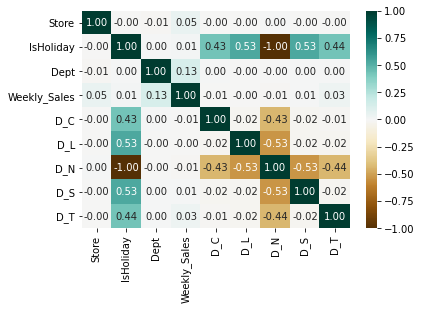

In [41]:
# Correlation map to ascertain features that have most correlation with each other.
sns.heatmap(trainf.corr(),annot =True,fmt=".2f",cmap="BrBG")

From the above map, it is evident that Dept has a strong correlation with weekly sales making it a very good feature to have

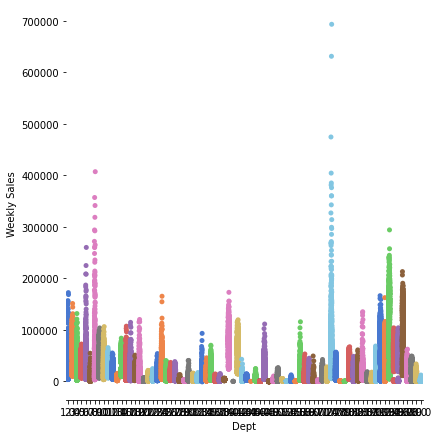

In [46]:
# Explore SibSp feature vs Survived
g = sns.catplot(x="Dept",y="Weekly_Sales",data=trainf,kind="strip", height = 6 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Weekly Sales")

In [44]:
trainf.Dept.unique()
# We have a total of 80 dept, Thus The congestion in the x-axis. This still proves how this is feature holds much weight

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
       28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 40., 41.,
       42., 44., 45., 46., 47., 48., 49., 51., 52., 54., 55., 56., 58.,
       59., 60., 67., 71., 72., 74., 77., 78., 79., 80., 81., 82., 83.,
       85., 87., 90., 91., 92., 93., 94., 95., 96., 97., 98., 99., 39.,
       50., 43.])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f266c798ef0>,
      dtype=object)

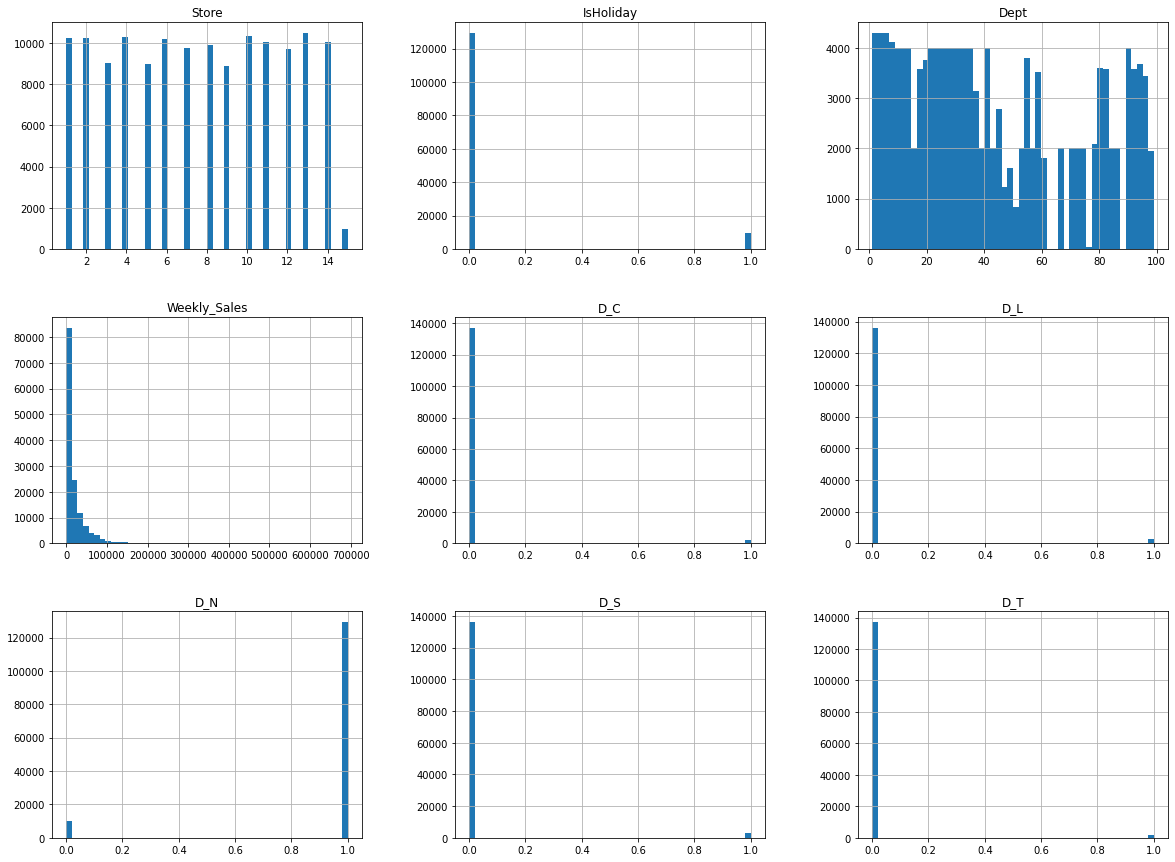

In [48]:
# Lets plot a hist and see the correlation of each attribute more closely
#%matplotlib inline not specified
trainf.hist(bins=50, figsize=(20,15))

In [49]:
# Lets now chose a model.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

In [ ]:
### Attempting to change the string object into a date format
'''features.Date =features["Date"].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%d-%m'))'''

## Try func = lambda x : x.strptime(date,format)
# dataframe.apply(function)

'''features['Date'] = [dt.datetime.strptime(d,'%Y:%m:%d') for d in features.Date]
features['time'] = [d.time() for d in features.Date]
features['Date'] = pd.to_datetime(features['Date'])
features['time'] = pd.to_datetime(features['time'], format='%H:%M:%S:%f', errors = 'ignore')'''